## Visualization
Rosenbaum's test has a known, exact null distribution, which is exactly distribution free, meaning that the test works for any underlying distributions F and G which are tested on being equal. 
It constructs an optimal bi-partite matching of all observations, meaning that it pairs each data point to exactly one other, minimizing the within-pair distances.
If F and G are similar or equal, the matching will result in a high number of cross-matches (pairs with one observation from each of the groups). If they are different, the minimal distance pairs will mostly be from the same groups.    
This notebooks visualizes the Rosenbaum test with two distributions. 

#### Experiment with the distributions to see the effects on the matching!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import networkx as nx
import pandas as pd
import anndata as ad
import sys
sys.path.append("..")
from rosenbaum import *
import seaborn as sns
import matplotlib.pyplot as plt

found cupy installation, will try use the GPU to calculate the distance matrix.


In [23]:
num_samples_A = 50
num_samples_B = 50

samples_A = [np.random.normal(0, 4, 2) for _ in range(num_samples_A)]
samples_B = [np.random.normal(5, 4, 2) for _ in range(num_samples_B)]
groups = ["A"] * num_samples_A + ["B"] * num_samples_B
samples = np.array(samples_A + samples_B)
data = pd.DataFrame(samples, columns=["X", "Y"])
data["Group"] = groups

In [24]:
pval, cross_matches = rosenbaum(data, group_by="Group", test_group="A")

computing variable-wise ranks.
using CPU to calculate distance matrix due to chosen metric.


In [25]:
matches = match_samples(samples, metric="mahalanobis")
matching_graph = nx.Graph()
matching_graph.add_edges_from(matches)
matching_nodes = list(matching_graph.nodes)

using CPU to calculate distance matrix due to chosen metric.


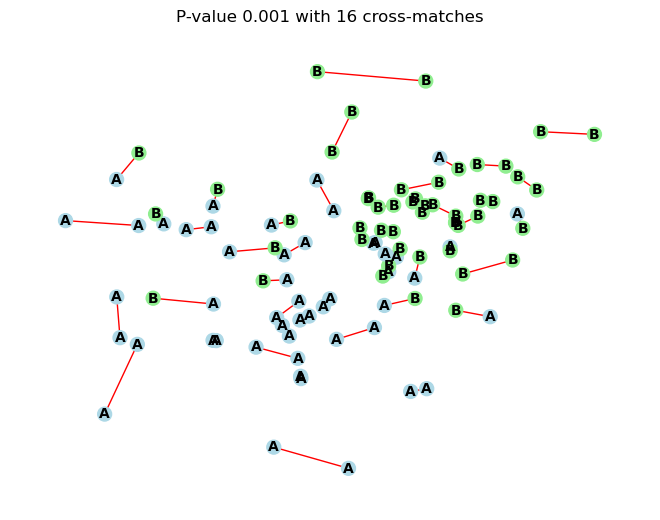

In [26]:
adjusted_colors = ['lightblue' if groups[node] == 'A' else 'lightgreen' for node in matching_nodes]
adjusted_labels = {node: groups[node] for node in matching_nodes}
adjusted_pos = {node: samples[node] for node in matching_nodes}

nx.draw(
    matching_graph,
    adjusted_pos,
    with_labels=True,
    labels=adjusted_labels,
    node_color=adjusted_colors,
    node_size=100,
    font_size=10,
    font_weight='bold',
    edge_color='red'
)
plt.title(f"P-value {pval:.3f} with {cross_matches} cross-matches")
plt.show()